In [2]:
import pandas as pd
import numpy as np
import os
import glob
import cv2
import PIL
from PIL import Image

%matplotlib inline
from matplotlib import pyplot as plt

# import data

- fold-1

In [3]:
fold = 1

In [4]:
df_2dFFT = pd.read_csv("/home/kannika/codes_AI/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-3channels-3Fold-split3class.csv")
train_2dFFT = df_2dFFT[df_2dFFT['fold']!=fold].reset_index(drop=True)
print("Fold Train set", set(train_2dFFT['fold']))
print(train_2dFFT.shape)

test_2dFFT = df_2dFFT[df_2dFFT['fold']==fold].reset_index(drop=True)
print("Fold Test set", set(test_2dFFT['fold']))
print(test_2dFFT.shape)

test_2dFFT.head()

Fold Train set {2, 3}
(192, 14)
Fold Test set {1}
(96, 14)


,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary
0,0,0,239,239,HN35_D0_30HZ_20XINF_UWELL_25660131_162844_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_162844,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
1,1,1,269,269,HN38_D0_30HZ_20XINF_UWELL_25660223_145353_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_145353,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1
2,2,2,240,240,HN35_D0_30HZ_20XINF_UWELL_25660131_163058_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_163058,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
3,3,3,265,265,HN38_D0_30HZ_20XINF_UWELL_25660223_144217_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144217,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1
4,4,4,266,266,HN38_D0_30HZ_20XINF_UWELL_25660223_144746_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144746,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1


In [6]:
from tensorflow.keras.preprocessing import image

imgbroken = []
img_path = test_2dFFT['image_path'].tolist()
# Read the image and resize it
for i in range(len(img_path)):
    print(f"[INFO]: img [{i+1}.]")
    pthimg = img_path[i]
    try:
        img = image.load_img(pthimg, target_size=(600, 600))
    except:
        imgbroken.append(pthimg)
        print(f"Found Images Broken!!")

2023-10-10 10:49:03.806722: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


[INFO]: img [1.]
[INFO]: img [2.]
[INFO]: img [3.]
[INFO]: img [4.]
[INFO]: img [5.]
[INFO]: img [6.]
[INFO]: img [7.]
[INFO]: img [8.]
Found Images Broken!!
[INFO]: img [9.]
[INFO]: img [10.]
[INFO]: img [11.]
[INFO]: img [12.]
[INFO]: img [13.]
[INFO]: img [14.]
[INFO]: img [15.]
[INFO]: img [16.]
[INFO]: img [17.]
[INFO]: img [18.]
[INFO]: img [19.]
[INFO]: img [20.]
[INFO]: img [21.]
[INFO]: img [22.]
[INFO]: img [23.]
[INFO]: img [24.]
[INFO]: img [25.]
[INFO]: img [26.]
[INFO]: img [27.]
[INFO]: img [28.]
[INFO]: img [29.]
[INFO]: img [30.]
[INFO]: img [31.]
[INFO]: img [32.]
[INFO]: img [33.]
[INFO]: img [34.]
[INFO]: img [35.]
[INFO]: img [36.]
[INFO]: img [37.]
[INFO]: img [38.]
[INFO]: img [39.]
[INFO]: img [40.]
[INFO]: img [41.]
[INFO]: img [42.]
[INFO]: img [43.]
[INFO]: img [44.]
[INFO]: img [45.]
[INFO]: img [46.]
[INFO]: img [47.]
[INFO]: img [48.]
[INFO]: img [49.]
[INFO]: img [50.]
[INFO]: img [51.]
[INFO]: img [52.]
[INFO]: img [53.]
[INFO]: img [54.]
[INFO]: img [55

In [7]:
print(len(imgbroken))
imgbroken

1


['/media/HDD/rheology2023/Blood_Viscosity_2dFFT/2dFFT_dataset_3channel/HN38_D0_30HZ_20XINF_UWELL_25660223_144945_dt2_5_7.png']

In [8]:
def get_pth_value(DF_folder, Numdt):
    DF_dt = DF_folder[DF_folder["dt"]==Numdt]
    np_pth_dt = DF_dt["npyfiles_path"]
    np_pth_dt_value = np_pth_dt.values[0]
    
    return np_pth_dt_value

In [9]:
def merged_channel_and_Normalize(np_pth_dt2, np_pth_dt5, np_pth_dt7):
    # LOAD NUMPY ARRAY 1
    LOADNUMPYARRAY_c1 = np.load(np_pth_dt2, allow_pickle = True)
    channel_1 = np.log(LOADNUMPYARRAY_c1)
    # LOAD NUMPY ARRAY 2
    LOADNUMPYARRAY_c2 = np.load(np_pth_dt5, allow_pickle = True)
    channel_2 = np.log(LOADNUMPYARRAY_c2)
    # LOAD NUMPY ARRAY 3
    LOADNUMPYARRAY_c3 = np.load(np_pth_dt7, allow_pickle = True)
    channel_3 = np.log(LOADNUMPYARRAY_c3)

    # merge the image back together again
    merged_channel = cv2.merge([channel_1, channel_2, channel_3])
    x_norm = np.array((merged_channel - np.min(merged_channel)) / (np.max(merged_channel) - np.min(merged_channel)))# Numpy array of normalized data

    # convert 0-1 image float array to 0-255 int array
    x_norm *=255
    x_norm_int = x_norm.astype(int)

    return x_norm_int

In [11]:
dataFFT = pd.read_csv("/home/kannika/codes_AI/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-6Fold.csv")
dataFFT_ = dataFFT.loc[(dataFFT['dt'] == 2) | (dataFFT['dt'] == 5) | (dataFFT['dt'] == 7)].reset_index(drop=True)
print(set(dataFFT_["dt"]))
print(dataFFT_.shape)
dataFFT_.head()

{2, 5, 7}
(1614, 12)


,Unnamed: 0,Unnamed: 0.1,image_name,image_path,image_folder,folder_source,classes,Code_,subclass_,fold,npyfiles_path,dt
0,1,1,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt2...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,2
1,3,3,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt5...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,5
2,5,5,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt7...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,7
3,8,8,HN01_D0_30HZ_20XINF_UWELL_20221027_154831_idt2...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154831,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,2
4,10,10,HN01_D0_30HZ_20XINF_UWELL_20221027_154831_idt5...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154831,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,5


In [18]:
list_folder = ['HN38_D0_30HZ_20XINF_UWELL_25660223_144945']
print(list_folder)
basepath2save = "/media/HDD/rheology2023/Blood_Viscosity_2dFFT/2dFFT_dataset_3channel"
print(basepath2save)

['HN38_D0_30HZ_20XINF_UWELL_25660223_144945']
/media/HDD/rheology2023/Blood_Viscosity_2dFFT/2dFFT_dataset_3channel


In [21]:
import imageio

for j in range(len(list_folder)):
    print(f"[INFO]: On process Folder: [{j+1}]")
    DF_folder = dataFFT_[dataFFT_['image_folder']==list_folder[j]].reset_index(drop=True)
    DF_folder.sort_values(by='dt', ascending=True)
    print(DF_folder.shape)
    ## set Value to save dataFrame
    image_folder = list(set(DF_folder["image_folder"]))[0]
    dt = list(set(DF_folder["dt"]))
    dt2 = dt[0]
    dt5 = dt[1]
    dt7 = dt[2]
    image_name = f"{image_folder}_dt{dt2}_{dt5}_{dt7}.png"
    image_path = f"{basepath2save}/{image_name}"
    ## Read NUMPYARRAY
    np_pth_dt2 = get_pth_value(DF_folder, 2)
    np_pth_dt5 = get_pth_value(DF_folder, 5)
    np_pth_dt7 = get_pth_value(DF_folder, 7)
    img3chanel = merged_channel_and_Normalize(np_pth_dt2, np_pth_dt5, np_pth_dt7)
    print(img3chanel.shape)
    # img3chanel
    ## Save image
    imageio.imwrite(image_path, img3chanel) 
    print(f"[INFO]: Save 2dFFT images 3 Channels ==> at [ {image_path} ]")
    print("#"*125)

[INFO]: On process Folder: [1]
(3, 12)


Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


(800, 800, 3)
[INFO]: Save 2dFFT images 3 Channels ==> at [ /media/HDD/rheology2023/Blood_Viscosity_2dFFT/2dFFT_dataset_3channel/HN38_D0_30HZ_20XINF_UWELL_25660223_144945_dt2_5_7.png ]
#############################################################################################################################


In [22]:
image_path

'/media/HDD/rheology2023/Blood_Viscosity_2dFFT/2dFFT_dataset_3channel/HN38_D0_30HZ_20XINF_UWELL_25660223_144945_dt2_5_7.png'

(800, 800, 3)


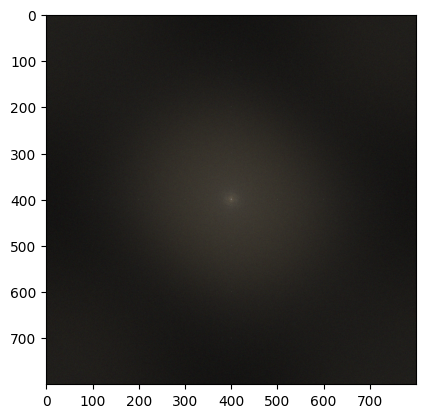

In [23]:
imgidt_test = cv2.imread(image_path)
print(imgidt_test.shape)
#plt.imshow(imgidt_test,cmap='gray')  
plt.imshow(imgidt_test)  